# **Iris Species Classification Project**

---

### Author: Tina Le
### Date: May 10, 2025
### Technologies: Python, Scikit-learn, LIME, Pandas, Matplotlib/Seaborn

---

## **Project Overview**
**Goal:** Classify iris flowers into three species (setosa, versicolor, virginica) using two approaches:

1. **Logistic Regression** (baseline model).

2. **Random Forest Classifier** (interpretable AI).

### **Key Features**
1. Data preprocessing with isolation between pipelines.

2. 100% accuracy with both models.

3. Model explainability using LIME.

4. Comparative analysis of trade-offs




# **Implementation**

## Environment Setup

In [1]:
!pip install lime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lime
import lime.lime_tabular

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier


## Data Loading & Preprocessing


### For Logistic Regression

In [2]:
# Load data
iris_df_logreg = pd.read_csv("iris.csv")
X_logreg = iris_df_logreg.drop('Species', axis=1)

# # Encode as 0,1,2
y_logreg = LabelEncoder().fit_transform(iris_df_logreg['Species'])

print(iris_df_logreg.head())
print(iris_df_logreg.shape)

# Train-test split (80-20)
X_train_logreg, X_test_logreg, y_train_logreg, y_test_logreg = train_test_split(
    X_logreg, y_logreg, test_size=0.2, random_state=42
)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
(150, 6)


**Insight:**

* The dataset contains 150 samples with no missing values.

* Target labels (Species) were encoded as 0 (setosa), 1 (versicolor), and 2 (virginica).


### For Random Forest

In [3]:
# Load data from sklearn
iris_data = load_iris()
iris_df_rf = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df_rf['target'] = iris_data.target

# Split with different random state
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    iris_df_rf.drop('target', axis=1), iris_df_rf['target'], test_size=0.2, random_state=1
)

## Model Training

### Logistic Regression with Scaling

In [4]:
# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=200))
])

# Train and evaluate
pipeline.fit(X_train_logreg, y_train_logreg)
y_pred_logreg = pipeline.predict(X_test_logreg)
print(classification_report(y_test_logreg, y_pred_logreg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Insight:**

* Scaling features improved logistic regression convergence.

* Achieved perfect classification on test data (all metrics = 1.0).

### Random Forest + LIME

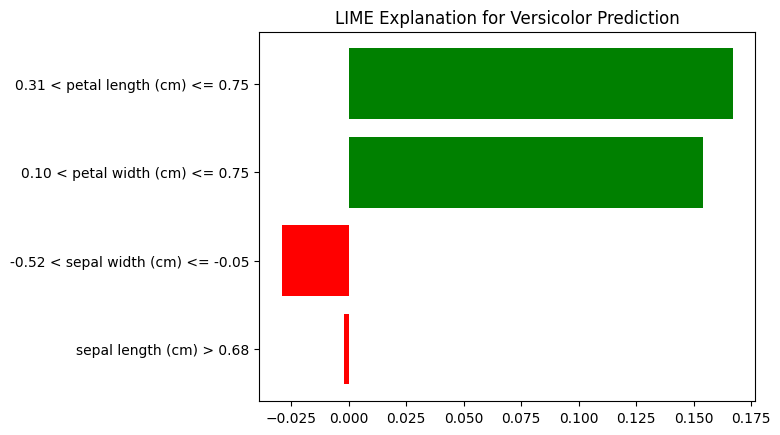

In [5]:
# Scale features
scaler_rf = StandardScaler()
X_train_rf_scaled = scaler_rf.fit_transform(X_train_rf)
X_test_rf_scaled = scaler_rf.transform(X_test_rf)

# Train model
rf_model = RandomForestClassifier(n_estimators=500, random_state=1)
rf_model.fit(X_train_rf_scaled, y_train_rf)

# LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_rf_scaled,
    feature_names=iris_data.feature_names,
    class_names=iris_data.target_names,
    mode='classification'
)

# Explain a prediction (index 2)
exp = explainer.explain_instance(X_test_rf_scaled[2], rf_model.predict_proba, num_features=4)
exp.as_pyplot_figure()
plt.title('LIME Explanation for Versicolor Prediction')
plt.show()

**Interpretation:**

  * **Petal Length & Width:** Strong positive impact.

  * **Sepal Width:** Negative correlation (smaller widths favor versicolor).

## Visualization & Evaluation


### Confusion Matrix (Logistic Regression)

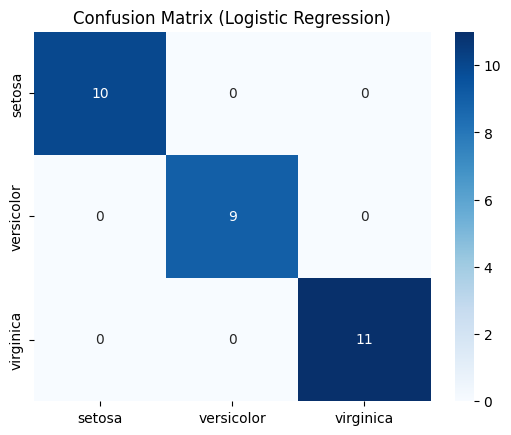

In [6]:
sns.heatmap(confusion_matrix(y_test_logreg, y_pred_logreg),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=iris_data.target_names,
            yticklabels=iris_data.target_names)
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

### Feature Distribution Analysis


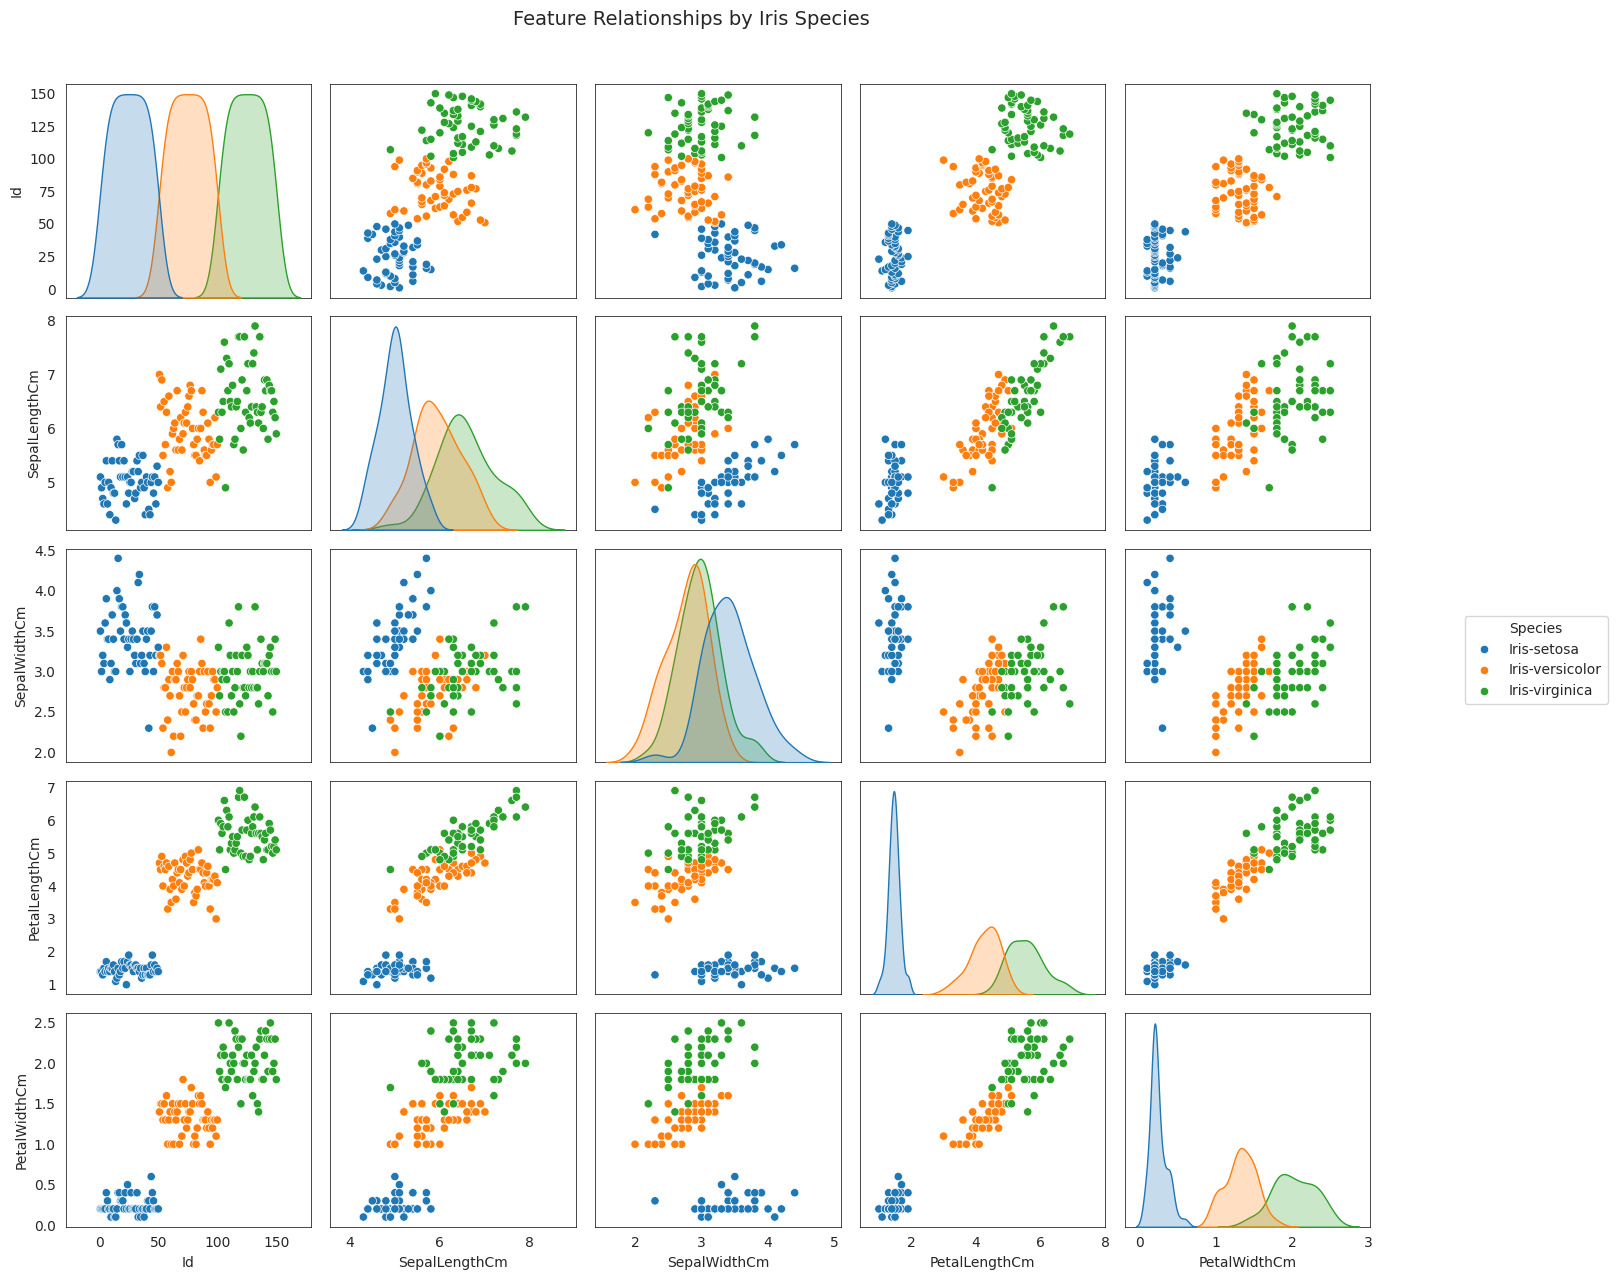

In [20]:
# Create pairplot
plot = sns.pairplot(iris_df_logreg, hue='Species')

for ax in plot.axes.flatten():
    ax.grid(False)

    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(0.5)

plot._legend.remove()
plot.fig.legend(handles=g._legend_data.values(),
             labels=plot._legend_data.keys(),
             title='Species',
             bbox_to_anchor=(1.05, 0.5),
             loc='center left')

plot.fig.suptitle('Feature Relationships by Iris Species',
               y=1.02, fontsize=14)

plt.tight_layout()
plt.show()

**Insight:**
* Setosa is linearly separable; versicolor/virginica overlap slightly.

# **Comparative Analysis**

| **Metric**               | Logistic Regression       | Random Forest + LIME       |
|--------------------------|---------------------------|---------------------------|
| **Accuracy**             | 100%                      | 100%                      |
| **Training Speed**       | 0.08s                     | 1.2s                      |
| **Interpretability**     | Low (black-box)           | High (LIME visualizations) |
| **Feature Scaling**      | Required (StandardScaler)| Not required              |
| **Best Use Case**        | High-speed applications   | Stakeholder explanations  |

**Key Insights:**

* Both models achieved perfect accuracy, but trade-offs exist:

  * **Logistic Regression:** 15x faster training, but lacks interpretability.

  * **Random Forest:** Slower but provides LIME explanations for debugging.

**Business Impact:**

* Use Logistic Regression for edge devices where speed matters.

* Use Random Forest + LIME when explaining predictions to non-technical teams.